In [3]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from load_util import load_util
from plot_util import plot_util
from pred_util import pred_util
import util
import os
data_folder = os.path.join('../', '../data')
file_name = "Data"

In [4]:
# Only run to update data file
leagues = ["E0"]
start_year, end_year = 2005, 2024
load_util.fetch_data_into_file(
    data_folder=data_folder,
    file_name=file_name,
    start_year=start_year,
    end_year=end_year,
    leagues=leagues,
)

Data fetched and saved to ../../data/Data.csv


In [5]:
data = load_util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,E0,2024-05-19,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,...,2.0,10.0,8.0,2.0,4.0,1.0,4.0,0.0,0.0,2324
7217,E0,2024-05-19,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,...,3.0,14.0,11.0,10.0,2.0,1.0,1.0,0.0,1.0,2324
7218,E0,2024-05-19,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,...,7.0,15.0,20.0,4.0,4.0,5.0,4.0,0.0,0.0,2324
7219,E0,2024-05-19,Man City,West Ham,3.0,1.0,H,2.0,1.0,H,...,2.0,3.0,12.0,11.0,2.0,0.0,1.0,0.0,0.0,2324


Split data into seasons

In [6]:
season_data = load_util.split_matches_into_seasons(
    data, 380, start_year=2005, end_year=2024
)

season_data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,2005/2006
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,2005/2006
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,2005/2006
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,2005/2006
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,2005/2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,E0,2024-05-19,Chelsea,Bournemouth,2.0,1.0,H,1.0,0.0,H,...,5.0,5.0,9.0,6.0,5.0,2.0,3.0,0.0,0.0,2023/2024
7216,E0,2024-05-19,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,...,2.0,10.0,8.0,2.0,4.0,1.0,4.0,0.0,0.0,2023/2024
7217,E0,2024-05-19,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,...,3.0,14.0,11.0,10.0,2.0,1.0,1.0,0.0,1.0,2023/2024
7218,E0,2024-05-19,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,...,7.0,15.0,20.0,4.0,4.0,5.0,4.0,0.0,0.0,2023/2024


Investigate colums with Nan

In [7]:
# Check for columns with NaN values
nan_columns = data.isna().sum()

# Filter to show only columns with NaN values
nan_columns_with_nan = nan_columns[nan_columns > 0]

# Display the result

rows_with_nan = data[data.isna().any(axis=1)]

# Print the rows with NaN values
print("Rows with NaN values:")
rows_with_nan

Rows with NaN values:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
3800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415


Removing the row with Nan values

In [9]:
data_cleaned = data.drop(index=3800)
#data_cleaned = data.drop(columns=["PSH", "PSD", "PSA"])

# Remove rows with any NaN values
data_cleaned = data_cleaned.dropna()

# Display the cleaned dataset to confirm
data_cleaned


has_nan = data_cleaned.isna().any().any()

# Print result
if has_nan:
    print("There are still NaN values in the dataset.")
else:
    print("No NaN values found in the dataset.")

# Check if there are any NaN values in the dataset
nan_counts = data_cleaned.isna().sum()

# Display columns that still have NaN values
print("Columns with NaN values and their count:")
print(nan_counts[nan_counts > 0])

No NaN values found in the dataset.
Columns with NaN values and their count:
Series([], dtype: int64)


In [11]:
season_dataframes = load_util.split_matches_into_seasons(
    data_cleaned, 380, start_year=2005, end_year=2024
)

#season_dataframes = season_dataframes.drop(columns=["Matchrating"])
#season_dataframes = season_dataframes.drop(columns=["Match Rating"])

season_dataframes

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,2005/2006
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,2005/2006
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,2005/2006
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,2005/2006
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,2005/2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,E0,2024-05-19,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,...,2.0,10.0,8.0,2.0,4.0,1.0,4.0,0.0,0.0,2023/2024
7216,E0,2024-05-19,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,...,3.0,14.0,11.0,10.0,2.0,1.0,1.0,0.0,1.0,2023/2024
7217,E0,2024-05-19,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,...,7.0,15.0,20.0,4.0,4.0,5.0,4.0,0.0,0.0,2023/2024
7218,E0,2024-05-19,Man City,West Ham,3.0,1.0,H,2.0,1.0,H,...,2.0,3.0,12.0,11.0,2.0,0.0,1.0,0.0,0.0,2023/2024


In [13]:
# Iterate over each unique season to isolate and process its data
unique_seasons = season_dataframes["Season"].unique()

for season in unique_seasons:
    print(f"Processing season: {season}")

    # Extract the rows for this season with their original indices
    season_df = season_dataframes[season_dataframes["Season"] == season].copy()

    # Reset the index for processing but keep track of the original index positions
    original_index = season_df.index
    season_df = season_df.reset_index(drop=True)

    # Calculate team stats and match rating for this season
    season_data_with_mr = util.calculate_team_stats(season_df)

    # Only take the rows with calculated Matchrating values (non-NaN)
    non_nan_matchrating = season_data_with_mr["Matchrating"].notna()

    # Update the "Matchrating" back in the main DataFrame for this season
    season_dataframes.loc[original_index[non_nan_matchrating], "Matchrating"] = (
        season_data_with_mr.loc[non_nan_matchrating, "Matchrating"].values
    )

# Verify the number of NaN values after processing
nan_counts = season_dataframes["Matchrating"].isna().sum()
print(f"Number of NaN values in 'Matchrating' after processing: {nan_counts}")

Processing season: 2005/2006
Skipped 52 matches due to insufficient previous matches.
Processing season: 2006/2007
Skipped 51 matches due to insufficient previous matches.
Processing season: 2007/2008
Skipped 53 matches due to insufficient previous matches.
Processing season: 2008/2009
Skipped 51 matches due to insufficient previous matches.
Processing season: 2009/2010
Skipped 53 matches due to insufficient previous matches.
Processing season: 2010/2011
Skipped 50 matches due to insufficient previous matches.
Processing season: 2011/2012
Skipped 51 matches due to insufficient previous matches.
Processing season: 2012/2013
Skipped 51 matches due to insufficient previous matches.
Processing season: 2013/2014
Skipped 50 matches due to insufficient previous matches.
Processing season: 2014/2015
Skipped 50 matches due to insufficient previous matches.
Processing season: 2015/2016
Skipped 50 matches due to insufficient previous matches.
Processing season: 2016/2017
Skipped 50 matches due to

A look at tha data with matchratings


In [14]:
season_dataframes

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,Season,Matchrating
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,2005/2006,NaN
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,2005/2006,NaN
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,2005/2006,NaN
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,2005/2006,NaN
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,2005/2006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,E0,2024-05-19,Crystal Palace,Aston Villa,5.0,0.0,H,2.0,0.0,H,...,10.0,8.0,2.0,4.0,1.0,4.0,0.0,0.0,2023/2024,9.0
7216,E0,2024-05-19,Liverpool,Wolves,2.0,0.0,H,2.0,0.0,H,...,14.0,11.0,10.0,2.0,1.0,1.0,0.0,1.0,2023/2024,9.0
7217,E0,2024-05-19,Luton,Fulham,2.0,4.0,A,1.0,2.0,A,...,15.0,20.0,4.0,4.0,5.0,4.0,0.0,0.0,2023/2024,-5.0
7218,E0,2024-05-19,Man City,West Ham,3.0,1.0,H,2.0,1.0,H,...,3.0,12.0,11.0,2.0,0.0,1.0,0.0,0.0,2023/2024,27.0


A look at the matchrating for every match in every season since 2005/06

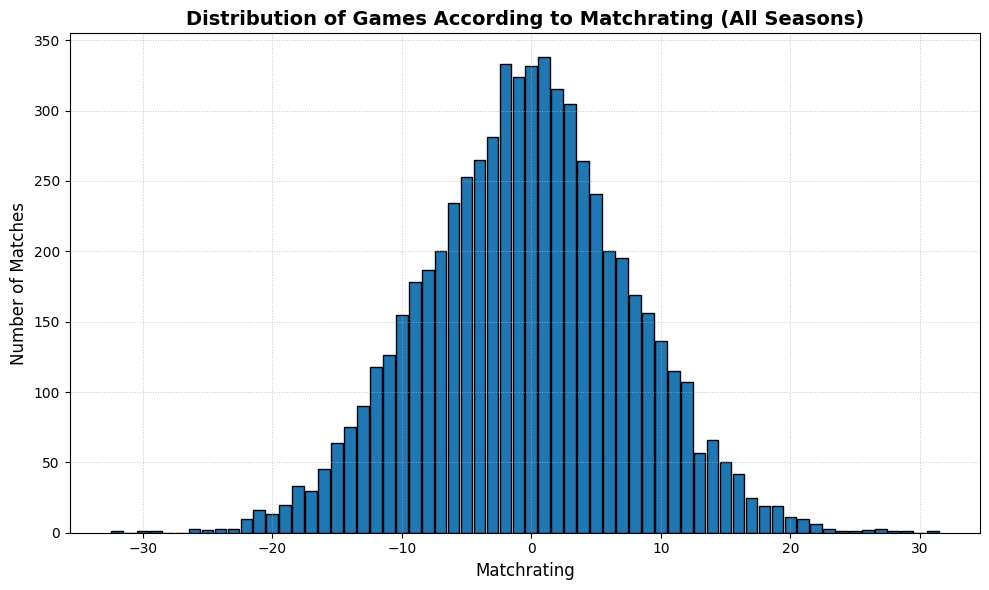

Total Matchrating sum for all seasons: -2482.0


In [15]:
# Plot the histogram for all seasons combined
all_seasons_matchrating = season_dataframes["Matchrating"].dropna()

plot_util.plot_histogram(
    all_seasons_matchrating,
    figsize=(10, 6),
    title="Distribution of Games According to Matchrating (All Seasons)",
    xlabel="Matchrating",
    ylabel="Number of Matches",
)

# Calculate and print the total sum of match ratings for all seasons
sum_match_rating = all_seasons_matchrating.sum()
print(f"Total Matchrating sum for all seasons: {sum_match_rating}")

Looking at how outcome of the match is related to the matchrating

In [16]:
outcome_percentages = util.calculate_outcome_percentages(season_dataframes)

# Display the resulting DataFrame
outcome_percentages

Outcome,Home Wins %,Draw %,Away Wins %,Number of Away Wins,Number of Draws,Number of Home Wins
Matchrating,,,,,,
-32.0,0.000000,0.000000,100.000000,1,0,0
-30.0,0.000000,0.000000,100.000000,1,0,0
-29.0,100.000000,0.000000,0.000000,0,0,1
-26.0,0.000000,0.000000,100.000000,3,0,0
-25.0,0.000000,0.000000,100.000000,2,0,0
-24.0,0.000000,0.000000,100.000000,3,0,0
-23.0,0.000000,66.666667,33.333333,1,2,0
-22.0,10.000000,10.000000,80.000000,8,1,1
-21.0,18.750000,25.000000,56.250000,9,4,3
